# 1. Ejercicio *PCA* - Nutrición

En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con *PCA*: preprocesar los datos antes de calcular sus PCs, interpretarlos, visualizar y escoger número de componentes según la varianza explicada.

### 0. Importa las librerías necesarias

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### 1. Importa los datos
* Importa los datos: *nndb.csv*
* Observa las columnas que hay, así como su tipo.

In [10]:
data_original = pd.read_csv("data/nndb_flat.csv")
data_original.head()

ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1       0.85  81.11  ...        0.0075      0.002625          0.026154   
2       0.28  99.48  ...        0.0000      0.000188          0.003846   
3      21.40  28.74  ...        0.0900      0.063500          0.293846   
4      23.24  29.68  ...        0.0500      0.007375          0.270000   

   Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  \
0       0.004167       0.020000      0.000000         0.004762   
1       0.004167       0.020000      0.000018         0.004762   
2       0.000833       0.003333      0.000001         0.000000   
3       0.024167       0.440000      0.000044         0.054762   
4       0.011667       0.561667      0.000027         0.057143   

   Phosphorus_USRDA  Selenium_USRDA  Zinc_USRDA  
0          0.034286        0.018182    0.008182  
1          0.032857        0.018182    0.004545  
2          0.004286        0.000000    0.000909  
3          0.552857        0.263636    0.241818  
4          0.644286        0.263636    0.236364  

[5 rows x 45 columns]

In [11]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [12]:
data_original.describe()

ID  Energy_kcal   Protein_g        Fat_g       Carb_g  \
count   8618.000000  8618.000000  8618.00000  8618.000000  8618.000000   
mean   15467.757368   226.438617    11.52391    10.647024    21.819062   
std     9221.428766   169.388910    10.55059    15.866353    27.239000   
min     1001.000000     0.000000     0.00000     0.000000     0.000000   
25%     8695.250000    93.000000     2.47000     0.992500     0.040000   
50%    14273.000000   191.000000     8.28500     5.235000     8.945000   
75%    20050.750000   336.000000    19.97750    13.900000    32.900000   
max    93600.000000   902.000000    88.32000   100.000000   100.000000   

           Sugar_g      Fiber_g      VitA_mcg     VitB6_mg   VitB12_mcg  ...  \
count  8618.000000  8618.000000   8618.000000  8618.000000  8618.000000  ...   
mean      6.560253     2.023242     93.968786     0.264369     1.225260  ...   
std      13.602098     4.313670    779.362205     0.478614     4.319183  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000      0.000000     0.034250     0.000000  ...   
50%       0.370000     0.300000      1.500000     0.120000     0.080000  ...   
75%       5.300000     2.400000     21.000000     0.355000     1.297500  ...   
max      99.800000    79.000000  30000.000000    12.000000    98.890000  ...   

       Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  Thiamin_USRDA  \
count   8618.000000   8618.000000       8618.000000    8618.000000   
mean       0.125765      0.213222          0.182499       0.174881   
std        0.466402      0.302161          0.346062       0.431974   
min        0.000000      0.000000          0.000000       0.000000   
25%        0.000000      0.023875          0.035385       0.025000   
50%        0.017500      0.131250          0.115385       0.064583   
75%        0.062500      0.314328          0.200000       0.185833   
max       14.702500      7.968750         13.461538      19.479167   

       Calcium_USRDA  Copper_USRDA  Magnesium_USRDA  Phosphorus_USRDA  \
count    8618.000000   8618.000000      8618.000000       8618.000000   
mean        0.061176      0.000191         0.077965          0.222838   
std         0.167803      0.000615         0.133496          0.290133   
min         0.000000      0.000000         0.000000          0.000000   
25%         0.007500      0.000033         0.023810          0.052857   
50%         0.015833      0.000088         0.047619          0.190000   
75%         0.051667      0.000161         0.069048          0.308571   
max         6.136667      0.016722         1.859524         14.168571   

       Selenium_USRDA   Zinc_USRDA  
count     8618.000000  8618.000000  
mean         0.229363     0.179111  
std          0.514406     0.305292  
min          0.000000     0.000000  
25%          0.001818     0.020909  
50%          0.070909     0.076818  
75%          0.387273     0.245455  
max         34.854545     8.268182  

[8 rows x 39 columns]

### 2. Observa la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [13]:
data_original.corr(numeric_only=True)

ID  Energy_kcal  Protein_g     Fat_g    Carb_g  \
ID                1.000000     0.126126   0.075538 -0.011996  0.177297   
Energy_kcal       0.126126     1.000000   0.110302  0.806795  0.487096   
Protein_g         0.075538     0.110302   1.000000  0.054715 -0.301974   
Fat_g            -0.011996     0.806795   0.054715  1.000000 -0.054116   
Carb_g            0.177297     0.487096  -0.301974 -0.054116  1.000000   
Sugar_g           0.082710     0.313151  -0.266170 -0.001962  0.615344   
Fiber_g           0.008252     0.197338  -0.072777 -0.028842  0.458192   
VitA_mcg         -0.031211     0.026329   0.026483  0.024379  0.001871   
VitB6_mg         -0.060463     0.121872   0.228485 -0.046950  0.195571   
VitB12_mcg        0.016512    -0.012292   0.245423 -0.020786 -0.094636   
VitC_mg          -0.020974    -0.033495  -0.066456 -0.059993  0.076745   
VitE_mg          -0.056898     0.303701  -0.029481  0.338008  0.070298   
Folate_mcg       -0.051166     0.145936   0.008939 -0.058049  0.325170   
Niacin_mg         0.010387     0.174991   0.376939 -0.022671  0.173285   
Riboflavin_mg    -0.024343     0.155830   0.202480 -0.036286  0.232408   
Thiamin_mg        0.011311     0.187439   0.098360 -0.005785  0.281809   
Calcium_mg       -0.050720     0.123571   0.046888  0.015039  0.189106   
Copper_mcg       -0.003765     0.099513   0.158900  0.042765  0.062106   
Iron_mg          -0.050823     0.195564   0.126375 -0.040408  0.350463   
Magnesium_mg     -0.001867     0.255880   0.218611  0.070781  0.287207   
Manganese_mg      0.002451     0.037621   0.039742 -0.000592  0.055570   
Phosphorus_mg     0.045925     0.195181   0.444608  0.066086  0.073180   
Selenium_mcg      0.011775     0.056673   0.378369  0.037559 -0.114600   
Zinc_mg           0.009195     0.112766   0.416315  0.028264 -0.012187   
VitA_USRDA       -0.031211     0.026329   0.026483  0.024379  0.001871   
VitB6_USRDA      -0.060463     0.121872   0.228485 -0.046950  0.195571   
VitB12_USRDA      0.016512    -0.012292   0.245423 -0.020786 -0.094636   
VitC_USRDA       -0.020974    -0.033495  -0.066456 -0.059993  0.076745   
VitE_USRDA       -0.056898     0.303701  -0.029481  0.338008  0.070298   
Folate_USRDA     -0.051166     0.145936   0.008939 -0.058049  0.325170   
Niacin_USRDA      0.010387     0.174991   0.376939 -0.022671  0.173285   
Riboflavin_USRDA -0.024343     0.155830   0.202480 -0.036286  0.232408   
Thiamin_USRDA     0.011311     0.187439   0.098360 -0.005785  0.281809   
Calcium_USRDA    -0.050720     0.123571   0.046888  0.015039  0.189106   
Copper_USRDA     -0.003765     0.099513   0.158900  0.042765  0.062106   
Magnesium_USRDA  -0.001867     0.255880   0.218611  0.070781  0.287207   
Phosphorus_USRDA  0.045925     0.195181   0.444608  0.066086  0.073180   
Selenium_USRDA    0.011775     0.056673   0.378369  0.037559 -0.114600   
Zinc_USRDA        0.009195     0.112766   0.416315  0.028264 -0.012187   

                   Sugar_g   Fiber_g  VitA_mcg  VitB6_mg  VitB12_mcg  ...  \
ID                0.082710  0.008252 -0.031211 -0.060463    0.016512  ...   
Energy_kcal       0.313151  0.197338  0.026329  0.121872   -0.012292  ...   
Protein_g        -0.266170 -0.072777  0.026483  0.228485    0.245423  ...   
Fat_g            -0.001962 -0.028842  0.024379 -0.046950   -0.020786  ...   
Carb_g            0.615344  0.458192  0.001871  0.195571   -0.094636  ...   
Sugar_g           1.000000  0.115916  0.010143  0.088767   -0.050450  ...   
Fiber_g           0.115916  1.000000  0.005910  0.242804   -0.052045  ...   
VitA_mcg          0.010143  0.005910  1.000000  0.136605    0.581004  ...   
VitB6_mg          0.088767  0.242804  0.136605  1.000000    0.264325  ...   
VitB12_mcg       -0.050450 -0.052045  0.581004  0.264325    1.000000  ...   
VitC_mg           0.064152  0.081852  0.111279  0.271305    0.007264  ...   
VitE_mg           0.066057  0.160154  0.044129  0.286065    0.060618  ...   
Folate_mcg        0.161257  0.249075  0.108517  0.550087    0.

<Axes: >

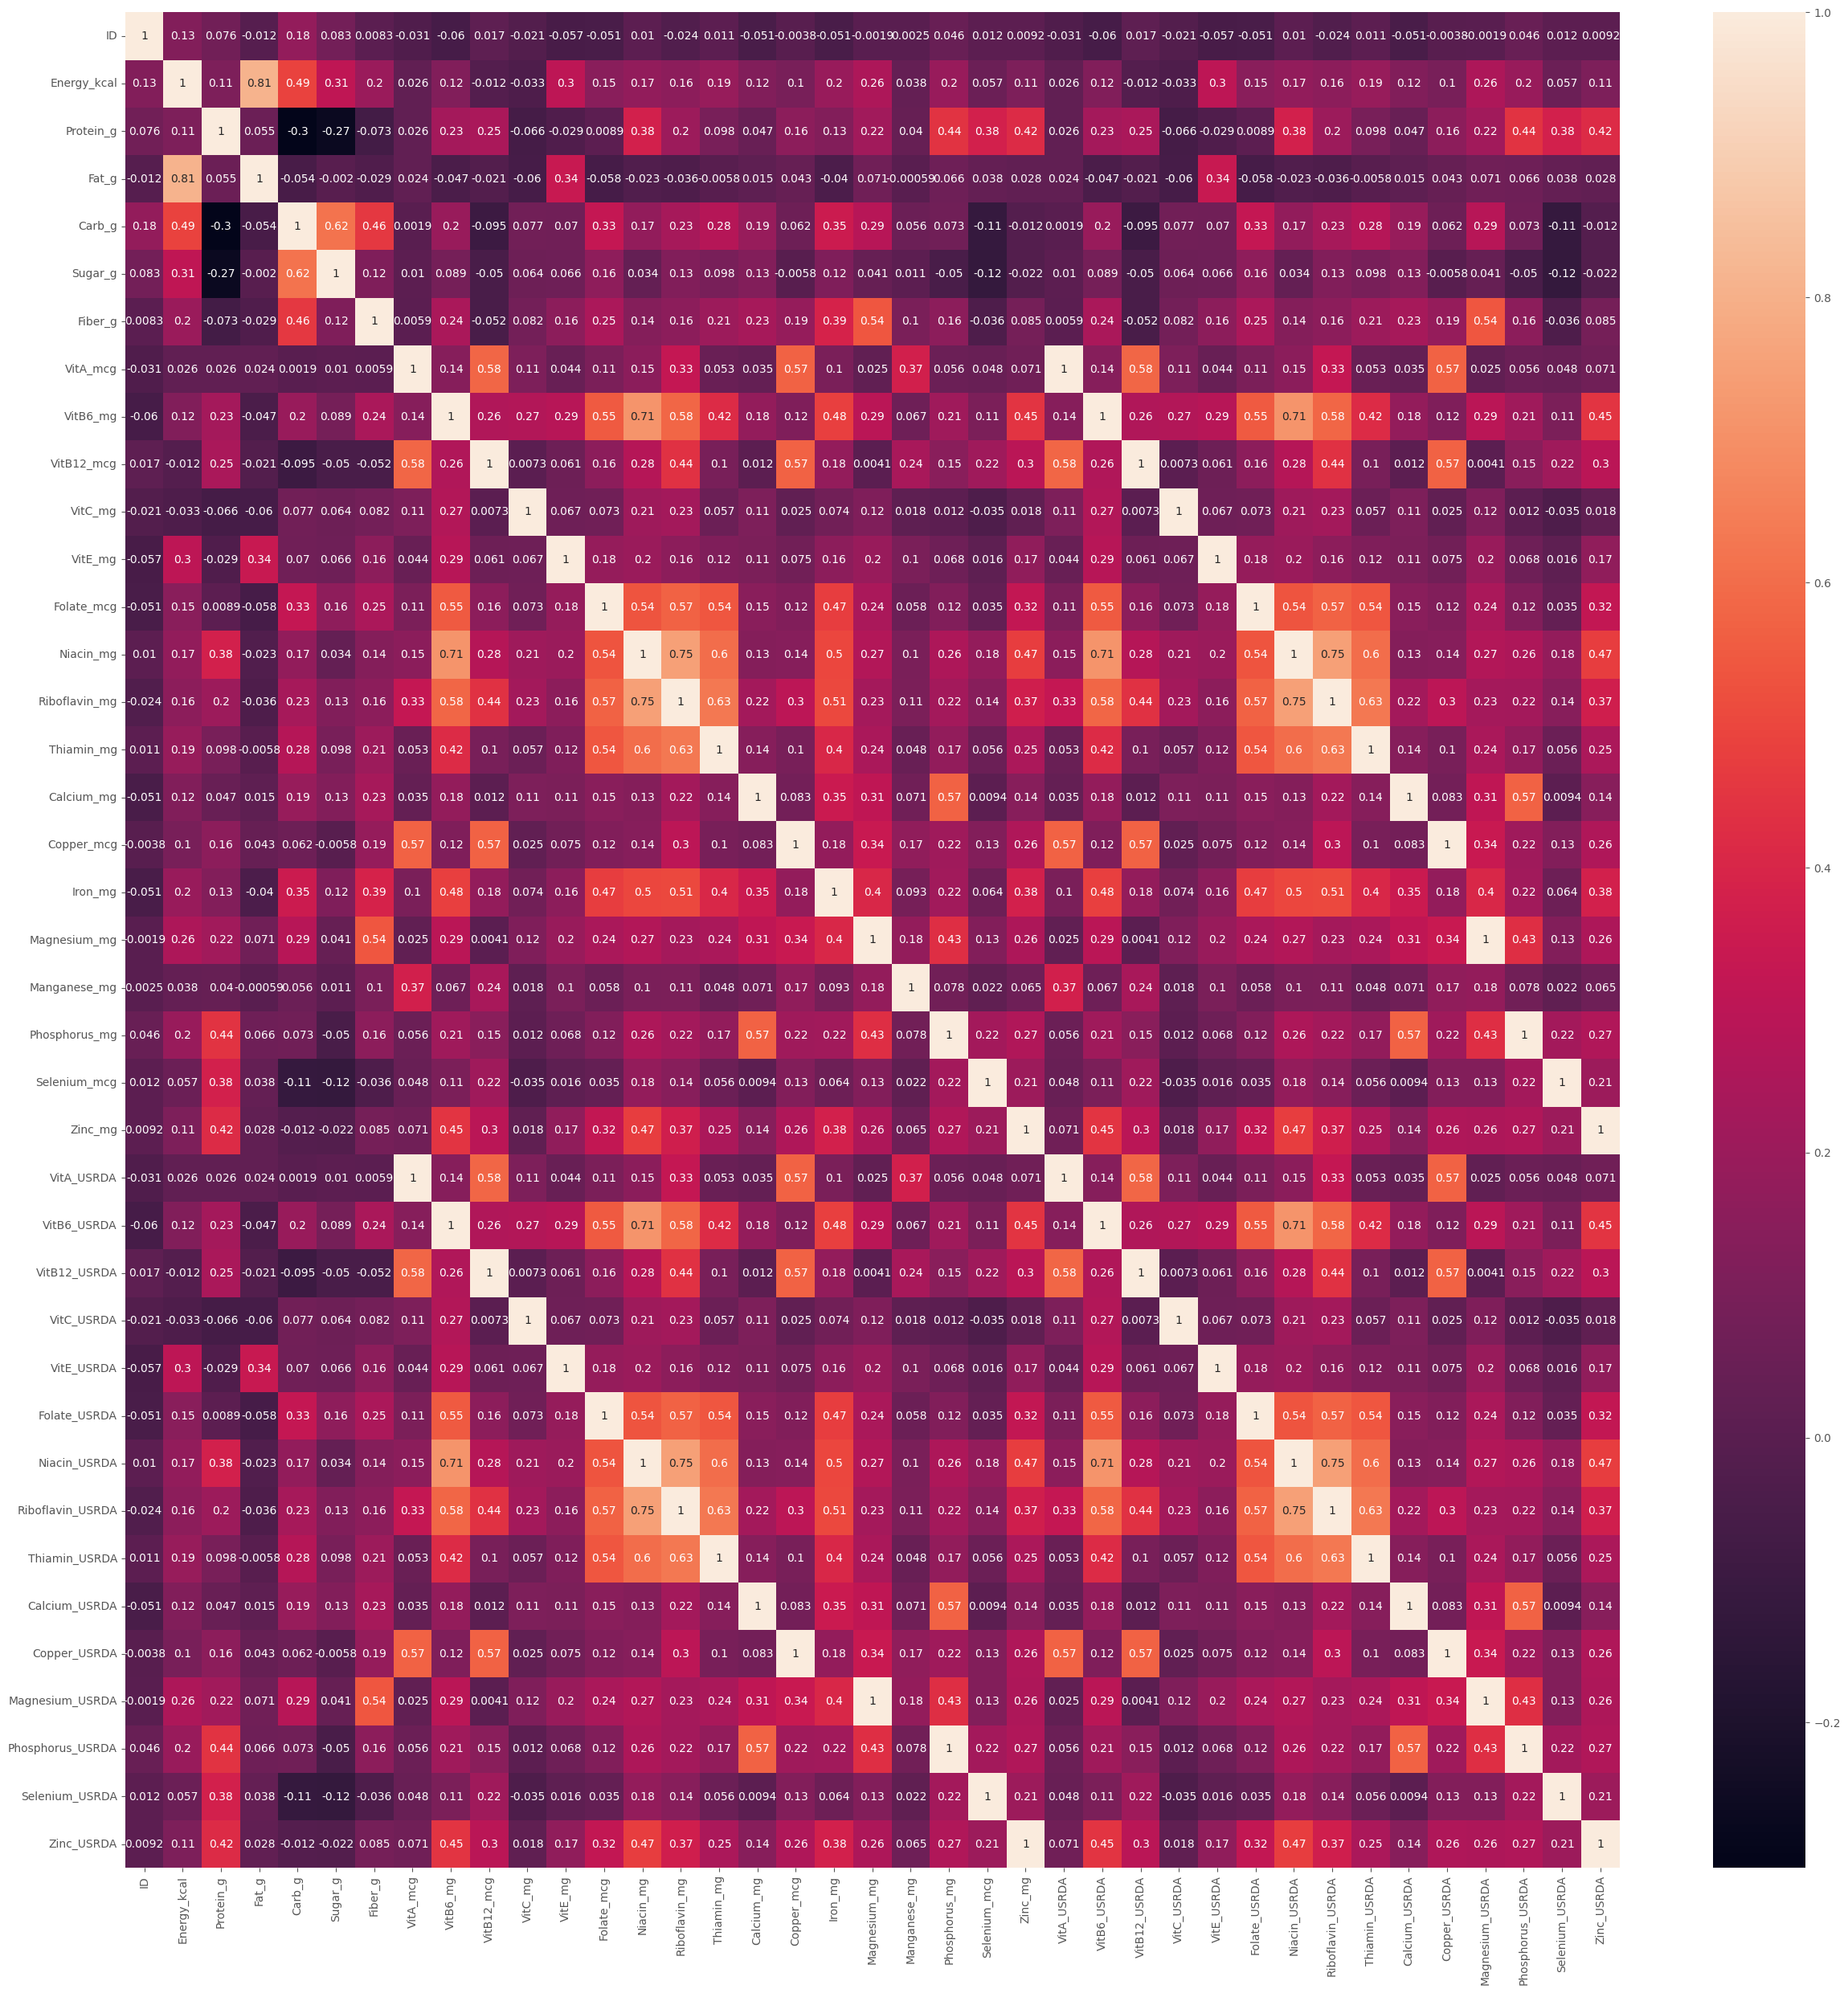

In [14]:
plt.figure(figsize=(30,30))
sns.heatmap(data_original.corr(numeric_only=True), annot=True)

In [15]:
data = data_original.iloc[:,:30]
data

ID                       FoodGroup                ShortDescrip  \
0      1001          Dairy and Egg Products            BUTTER,WITH SALT   
1      1002          Dairy and Egg Products    BUTTER,WHIPPED,WITH SALT   
2      1003          Dairy and Egg Products        BUTTER OIL,ANHYDROUS   
3      1004          Dairy and Egg Products                 CHEESE,BLUE   
4      1005          Dairy and Egg Products                CHEESE,BRICK   
...     ...                             ...                         ...   
8613  83110  Finfish and Shellfish Products             MACKEREL,SALTED   
8614  90240  Finfish and Shellfish Products  SCALLOP,(BAY&SEA),CKD,STMD   
8615  90480                          Sweets                  SYRUP,CANE   
8616  90560  Finfish and Shellfish Products                   SNAIL,RAW   
8617  93600  Finfish and Shellfish Products            TURTLE,GREEN,RAW   

                                                Descrip CommonName MfgName  \
0                                        Butter, salted        NaN     NaN   
1                            Butter, whipped, with salt        NaN     NaN   
2                                 Butter oil, anhydrous        NaN     NaN   
3                                          Cheese, blue        NaN     NaN   
4                                         Cheese, brick        NaN     NaN   
...                                                 ...        ...     ...   
8613                             Fish, mackerel, salted        NaN     NaN   
8614  Mollusks, scallop, (bay and sea), cooked, steamed        NaN     NaN   
8615                                        Syrup, Cane        NaN     NaN   
8616                               Mollusks, snail, raw        NaN     NaN   
8617                                 Turtle, green, raw        NaN     NaN   

     ScientificName  Energy_kcal  Protein_g  Fat_g  ...  Riboflavin_mg  \
0               NaN        717.0       0.85  81.11  ...          0.034   
1               NaN        717.0       0.85  81.11  ...          0.034   
2               NaN        876.0       0.28  99.48  ...          0.005   
3               NaN        353.0      21.40  28.74  ...          0.382   
4               NaN        371.0      23.24  29.68  ...          0.351   
...             ...          ...        ...    ...  ...            ...   
8613            NaN        305.0      18.50  25.10  ...          0.190   
8614            NaN        111.0      20.54   0.84  ...          0.024   
8615            NaN        269.0       0.00   0.00  ...          0.060   
8616            NaN         90.0      16.10   1.40  ...          0.120   
8617            NaN         89.0      19.80   0.50  ...          0.150   

      Thiamin_mg  Calcium_mg  Copper_mcg  Iron_mg  Magnesium_mg  Manganese_mg  \
0          0.005        24.0       0.000     0.02           2.0         0.000   
1          0.005        24.0       0.016     0.16           2.0         0.004   
2          0.001         4.0       0.001     0.00           0.0         0.000   
3          0.029       528.0       0.040     0.31          23.0         0.009   
4          0.014       674.0       0.024     0.43          24.0         0.012   
...          ...         ...         ...      ...           ...           ...   
8613       0.020        66.0       0.100     1.40          60.0         0.000   
8614       0.012        10.0       0.033     0.58          37.0         0.029   
8615       0.130        13.0       0.020     3.60          10.0         0.000   
8616       0.010        10.0       0.400     3.50         250.0         0.000   
8617       0.120       118.0       0.250     1.40          20.0         0.000   

      Phosphorus_mg  Selenium_mcg  Zinc_mg  
0              24.0           1.0     0.09  
1              23.0           1.0     0.05  
2               3.0           0.0     0.01  
3             387.0          14.5     2.66  
4             451.0          14.5     2.60  
...             ...           ...      

In [ ]:
# Obtener una lista de columnas de tipo object o el tipo que se quiera
# columnas_object = df.select_dtypes(include=['object', 'int']).columns.tolist()
# Eliminar las columnas de tipo object e int ya que está el id que no necesitamos
# df = df.drop(columns=columnas_object)

### 3. Variables no numéricas
Elimina las variables de texto del dataset

In [16]:
data = data.iloc[:, 7:]
data

Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  VitA_mcg  \
0           717.0       0.85  81.11    0.06     0.06      0.0     684.0   
1           717.0       0.85  81.11    0.06     0.06      0.0     684.0   
2           876.0       0.28  99.48    0.00     0.00      0.0     840.0   
3           353.0      21.40  28.74    2.34     0.50      0.0     198.0   
4           371.0      23.24  29.68    2.79     0.51      0.0     292.0   
...           ...        ...    ...     ...      ...      ...       ...   
8613        305.0      18.50  25.10    0.00     0.00      0.0      47.0   
8614        111.0      20.54   0.84    5.41     0.00      0.0       2.0   
8615        269.0       0.00   0.00   73.14    73.20      0.0       0.0   
8616         90.0      16.10   1.40    2.00     0.00      0.0      30.0   
8617         89.0      19.80   0.50    0.00     0.00      0.0      30.0   

      VitB6_mg  VitB12_mcg  VitC_mg  ...  Riboflavin_mg  Thiamin_mg  \
0        0.003        0.17      0.0  ...          0.034       0.005   
1        0.003        0.13      0.0  ...          0.034       0.005   
2        0.001        0.01      0.0  ...          0.005       0.001   
3        0.166        1.22      0.0  ...          0.382       0.029   
4        0.065        1.26      0.0  ...          0.351       0.014   
...        ...         ...      ...  ...            ...         ...   
8613     0.410       12.00      0.0  ...          0.190       0.020   
8614     0.112        2.15      0.0  ...          0.024       0.012   
8615     0.000        0.00      0.0  ...          0.060       0.130   
8616     0.130        0.50      0.0  ...          0.120       0.010   
8617     0.120        1.00      0.0  ...          0.150       0.120   

      Calcium_mg  Copper_mcg  Iron_mg  Magnesium_mg  Manganese_mg  \
0           24.0       0.000     0.02           2.0         0.000   
1           24.0       0.016     0.16           2.0         0.004   
2            4.0       0.001     0.00           0.0         0.000   
3          528.0       0.040     0.31          23.0         0.009   
4          674.0       0.024     0.43          24.0         0.012   
...          ...         ...      ...           ...           ...   
8613        66.0       0.100     1.40          60.0         0.000   
8614        10.0       0.033     0.58          37.0         0.029   
8615        13.0       0.020     3.60          10.0         0.000   
8616        10.0       0.400     3.50         250.0         0.000   
8617       118.0       0.250     1.40          20.0         0.000   

      Phosphorus_mg  Selenium_mcg  Zinc_mg  
0              24.0           1.0     0.09  
1              23.0           1.0     0.05  
2               3.0           0.0     0.01  
3             387.0          14.5     2.66  
4             451.0          14.5     2.60  
...             ...           ...      ...  
8613          254.0          73.4     1.10  
8614          426.0          21.7     1.55  
8615            8.0           0.7     0.19  
8616          272.0          27.4     1.00  
8617          180.0          16.8     1.00  

[8618 rows x 23 columns]

### 4. Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al *PCA* y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

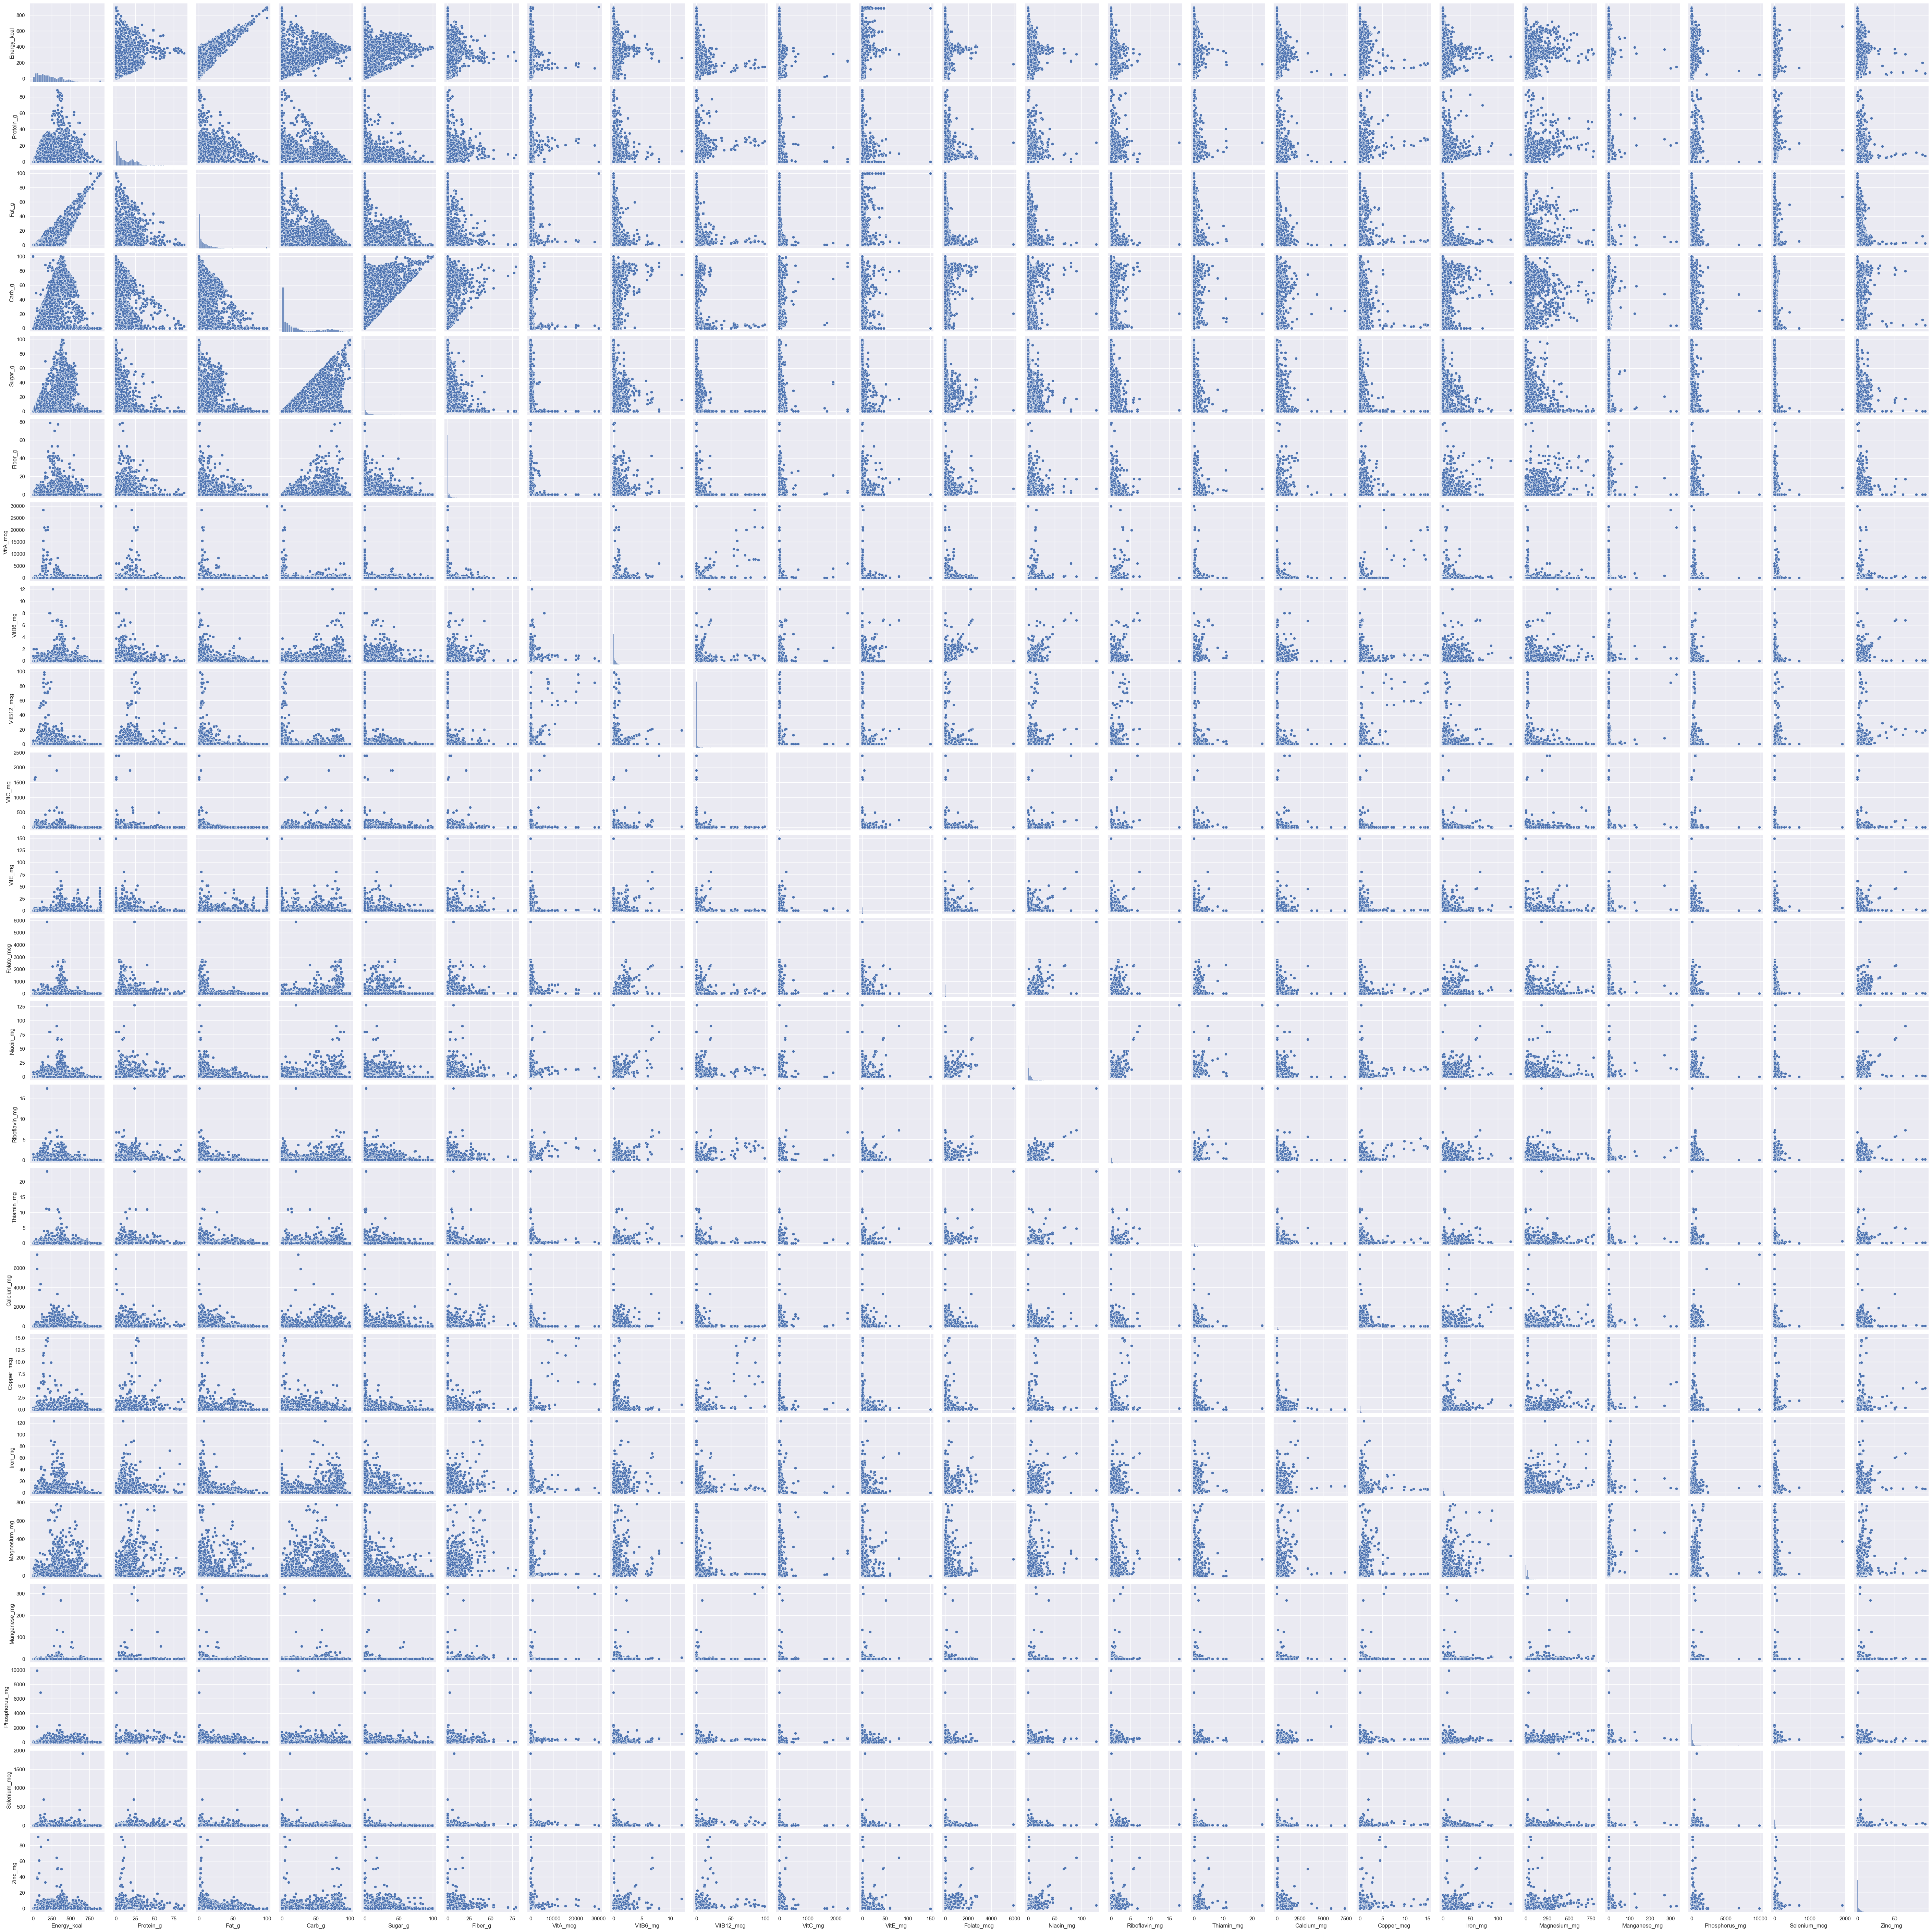

In [113]:
sns.pairplot(data)

In [17]:
for i in data.columns:
    data[i] = np.log1p(data[i])
print(data)

      Energy_kcal  Protein_g     Fat_g    Carb_g   Sugar_g  Fiber_g  VitA_mcg  \
0        6.576470   0.615186  4.408060  0.058269  0.058269      0.0  6.529419   
1        6.576470   0.615186  4.408060  0.058269  0.058269      0.0  6.529419   
2        6.776507   0.246860  4.609959  0.000000  0.000000      0.0  6.734592   
3        5.869297   3.109061  3.392493  1.205971  0.405465      0.0  5.293305   
4        5.918894   3.188004  3.423611  1.332366  0.412110      0.0  5.680173   
...           ...        ...       ...       ...       ...      ...       ...   
8613     5.723585   2.970414  3.261935  0.000000  0.000000      0.0  3.871201   
8614     4.718499   3.069912  0.609766  1.857859  0.000000      0.0  1.098612   
8615     5.598422   0.000000  0.000000  4.305955  4.306764      0.0  0.000000   
8616     4.510860   2.839078  0.875469  1.098612  0.000000      0.0  3.433987   
8617     4.499810   3.034953  0.405465  0.000000  0.000000      0.0  3.433987   

      VitB6_mg  VitB12_mcg 

### 5. Estandarizado
Estandariza cada variable.

No es necesario que dividas en *train* y *test*.

In [18]:
scaler = StandardScaler()
data_scal = scaler.fit_transform(data)

In [19]:
data_scal

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### 6. Implementación del *PCA*
Prueba a montar un *PCA* con todos las componentes. Para ello utiliza los datos previamente transformados y escalados.

In [20]:
pca = PCA()
pca.fit_transform(data_scal)

array([[-2.13903189, -0.96801891, -1.46398817, ...,  0.18965049,
        -0.11318379, -0.9906675 ],
       [-2.1064854 , -0.90950144, -1.48058025, ...,  0.27098865,
        -0.10503073, -0.99697913],
       [-3.26782972, -1.13842955, -2.04233529, ..., -0.04375945,
        -0.02955105, -0.96973915],
       ...,
       [-2.93052905,  1.66440526, -1.24206984, ...,  0.48350769,
         0.59177161, -0.63639048],
       [ 1.11889546, -0.78083408,  0.80512618, ...,  0.65270747,
         0.98403199,  0.37786612],
       [ 0.37955124, -1.27668203,  1.59197004, ...,  0.34724908,
         0.3352501 , -0.52011023]])

In [21]:
pca.components_

array([[ 1.98045037e-01,  2.77927414e-01,  1.48023630e-01,
         2.89780903e-03, -2.65499742e-02,  7.44287030e-02,
         7.99931465e-02,  2.63414232e-01,  2.15147624e-01,
        -2.41578310e-02,  8.06581235e-02,  1.95833995e-01,
         3.03454941e-01,  2.66735762e-01,  2.29400104e-01,
         1.54403008e-01,  1.88308882e-01,  2.81809108e-01,
         2.75670564e-01,  1.39020852e-01,  2.95597187e-01,
         2.47376233e-01,  2.98978117e-01],
       [ 5.43376081e-03, -2.42246049e-01, -1.50169742e-01,
         4.39120170e-01,  3.20254528e-01,  3.88059380e-01,
         1.09656229e-01,  7.44157690e-03, -2.36848125e-01,
         2.56138028e-01,  1.24465943e-01,  2.12485525e-01,
        -1.07131816e-01,  7.25659699e-02,  1.60925570e-01,
         2.04121098e-01,  1.36706989e-01,  1.24534002e-01,
         1.12674513e-01,  2.59182219e-01, -6.16379393e-02,
        -2.25185178e-01, -1.59529783e-01],
       [-5.22265271e-01, -7.90226661e-02, -4.73911046e-01,
        -2.10881292e-01, -1.8

### 7. Aportación de cada *PCA*
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del *PCA*.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos *Principal Components* te quedarías?

In [31]:
pca.explained_variance_ratio_

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


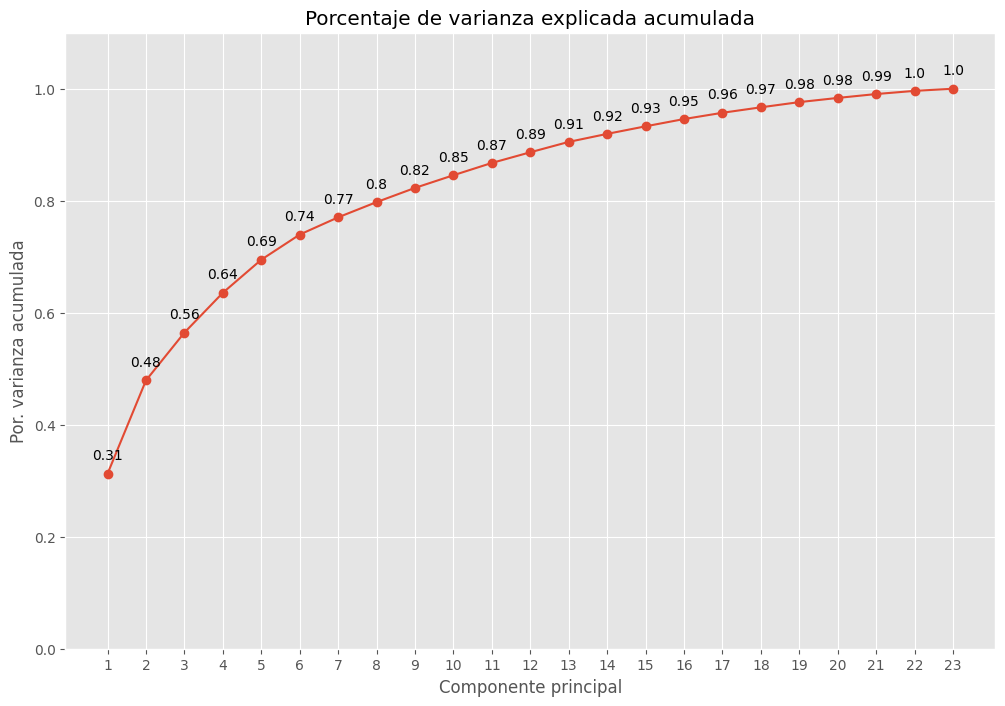

In [32]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## 8. Transformación
Crea un nuevo *PCA* con X Principal Components, siendo X la cantidad de *PC* escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X *features*, que representan los *PC* elegidos.

In [24]:
pca2 = PCA(n_components=6)
data_trans = pca2.fit_transform(data_scal)

In [26]:
df = pd.DataFrame(
    data = data_trans,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    index = data.index
)

In [27]:
df

PC1       PC2       PC3       PC4       PC5       PC6
0    -2.139032 -0.968012 -1.463963  0.270772  4.067024  0.307598
1    -2.106485 -0.909491 -1.480542  0.263057  4.032401  0.349182
2    -3.267829 -1.138417 -2.042284  1.175219  4.071695  1.327195
3     1.525964 -1.264117  0.135898 -0.929283  2.430403 -2.095384
4     1.240712 -1.204127  0.004656 -1.191616  2.691630 -2.341879
...        ...       ...       ...       ...       ...       ...
8613  2.553659 -2.548752  0.472114 -0.108805  2.718243  0.015736
8614  0.075018 -1.840929  0.935765 -1.348903 -0.391756 -0.760272
8615 -2.930527  1.664509 -1.241656  1.170293 -0.917249 -0.881504
8616  1.118897 -0.780764  0.805386 -1.583224  1.640146  1.093210
8617  0.379551 -1.276693  1.591978 -1.235769  0.717063 -0.643798

[8618 rows x 6 columns]

### 9. ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada *Principal Component*, los 3 grupos de comida (*FoodGroup*) con los valores del *PC* más altos.

In [28]:
df['FoodGroup'] = data_original.FoodGroup
df

PC1       PC2       PC3       PC4       PC5       PC6  \
0    -2.139032 -0.968012 -1.463963  0.270772  4.067024  0.307598   
1    -2.106485 -0.909491 -1.480542  0.263057  4.032401  0.349182   
2    -3.267829 -1.138417 -2.042284  1.175219  4.071695  1.327195   
3     1.525964 -1.264117  0.135898 -0.929283  2.430403 -2.095384   
4     1.240712 -1.204127  0.004656 -1.191616  2.691630 -2.341879   
...        ...       ...       ...       ...       ...       ...   
8613  2.553659 -2.548752  0.472114 -0.108805  2.718243  0.015736   
8614  0.075018 -1.840929  0.935765 -1.348903 -0.391756 -0.760272   
8615 -2.930527  1.664509 -1.241656  1.170293 -0.917249 -0.881504   
8616  1.118897 -0.780764  0.805386 -1.583224  1.640146  1.093210   
8617  0.379551 -1.276693  1.591978 -1.235769  0.717063 -0.643798   

                           FoodGroup  
0             Dairy and Egg Products  
1             Dairy and Egg Products  
2             Dairy and Egg Products  
3             Dairy and Egg Products  
4             Dairy and Egg Products  
...                              ...  
8613  Finfish and Shellfish Products  
8614  Finfish and Shellfish Products  
8615                          Sweets  
8616  Finfish and Shellfish Products  
8617  Finfish and Shellfish Products  

[8618 rows x 7 columns]

In [41]:
df.groupby(['FoodGroup']).mean().sort_values(by=['PC1'], ascending=False)

PC1       PC2       PC3       PC4  \
FoodGroup                                                                     
Breakfast Cereals                    4.020262  2.748094  0.236249  2.264690   
Nut and Seed Products                3.120684  2.267555 -1.241543 -2.092905   
Spices and Herbs                     2.562118  3.647769  0.361953 -1.603415   
Snacks                               1.874996  1.962723 -1.082045 -0.497182   
Beef Products                        1.674407 -2.753691  0.149236  0.037808   
Lamb, Veal, and Game Products        1.472704 -2.532158  0.120825  0.015469   
Poultry Products                     1.407736 -2.164594  0.502980 -0.072523   
Pork Products                        1.360203 -2.216490 -0.099352  0.356904   
Finfish and Shellfish Products       1.101114 -1.859419  1.247914 -0.719743   
Cereal Grains and Pasta              0.927684  1.320858 -0.552542 -1.323262   
Fast Foods                           0.540390  0.098518 -0.630923 -0.342342   
Legumes and Legume Products          0.438350  1.092720 -0.347305 -0.838161   
Sausages and Luncheon Meats          0.296453 -1.448844 -0.479300 -0.166906   
Baked Products                       0.167487  1.207305 -1.727760  0.366042   
Dairy and Egg Products              -0.017133 -0.267896  0.251817 -0.485146   
Restaurant Foods                    -0.041716 -0.016715 -0.773659 -0.421605   
American Indian/Alaska Native Foods -0.758860 -0.756795 -0.145434  0.087173   
Baby Foods                          -0.792919  1.260616  0.880904  0.494521   
Meals, Entrees, and Side Dishes     -0.924840  0.685017 -0.330410 -0.118376   
Vegetables and Vegetable Products   -1.533553  1.574058  1.800914 -0.500174   
Sweets                              -1.902101  1.265905 -1.209121  0.052485   
Fruits and Fruit Juices             -2.923483  1.615716  0.915606  0.186681   
Soups, Sauces, and Gravies          -3.173748  0.069452  0.213469  0.150404   
Beverages                           -3.259459  0.425915  0.958230  0.545088   
Fats and Oils                       -3.268544 -0.770813 -2.333703  1.044972   

                                          PC5       PC6  
FoodGroup                                                
Breakfast Cereals                   -0.907586 -0.107594  
Nut and Seed Products                0.084095  1.761431  
Spices and Herbs                    -0.232624  1.463031  
Snacks                               0.443472  0.372006  
Beef Products                       -0.192133  0.281460  
Lamb, Veal, and Game Products       -0.249834  0.280181  
Poultry Products                     0.255343 -0.149592  
Pork Products                       -0.423733 -0.015598  
Finfish and Shellfish Products       0.707775 -0.217757  
Cereal Grains and Pasta             -1.344043  0.263122  
Fast Foods                           0.417314 -0.798993  
Legumes and Legume Products         -0.888314  0.140190  
Sausages and Luncheon Meats          0.069861 -0.223067  
Baked Products                      -0.335598 -0.669069  
Dairy and Egg Products               1.555335 -1.647178  
Restaurant Foods                     0.700509 -0.418085  
American Indian/Alaska Native Foods -0.293143  0.265528  
Baby Foods                           0.929624 -0.277663  
Meals, Entrees, and Side Dishes      0.040037 -0.508305  
Vegetables and Vegetable Products   -0.045454  0.165424  
Sweets                               0.329511 -0.556331  
Fruits and Fruit Juices             -0.139107  0.102202  
Soups, Sauces, and Gravies          -0.328121  0.267365  
Beverages                           -0.456226  0.653841  
Fats and Oils                        2.634299  2.054169

In [40]:
df.nlargest(3, 'PC1')

PC1       PC2       PC3       PC4       PC5       PC6  \
1832  13.955160  6.524635  3.342511  7.914439  0.782417  5.403307   
1863  13.520430  6.597376  3.643090  7.937900  1.443866  3.775380   
2025  13.395407  5.384003  2.378530  9.262520  0.960255  5.392596   

              FoodGroup  
1832  Breakfast Cereals  
1863  Breakfast Cereals  
2025  Breakfast Cereals